<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
##### Your Code Here #####

#from tensorflow.keras.datasets import Boston - didn't work
#Import libraries

import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Found this to break out into train/test from inception

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [2]:
#Taking a look at the shape of the data

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [4]:
#create the model

model = Sequential()
model.add(Dense(12, input_dim = 13, activation = 'relu'))
model.add(Dense(1, activation = "sigmoid"))

#taking a look at the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12)                168       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [0]:
#compile

model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
#create EarlyStopping to help avoid overfitting

stop = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=3)

In [8]:
#Fit the model

model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[stop])

#not sure why I am getting these numbers?

Epoch 1/100
13/13 [==============================] - 0s 4ms/step - loss: 544.0403 - val_loss: 652.2457
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 547.4968 - val_loss: 652.2457
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 538.8947 - val_loss: 652.2457
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 543.5858 - val_loss: 652.2457


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [9]:
from tensorflow.keras.datasets import fashion_mnist

#use the same code from before to break into train/test

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [10]:
#looking at the shape

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [0]:
#define model

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(1280, activation='relu'))
model.add(Dense(20, activation='softmax'))

In [13]:
#summary of the model

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1280)              1004800   
_________________________________________________________________
dense_5 (Dense)              (None, 20)                25620     
Total params: 1,030,420
Trainable params: 1,030,420
Non-trainable params: 0
_________________________________________________________________


In [0]:
#compile

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
#EarlyStopping

stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3)

In [16]:
#fit the model

model.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test), callbacks=[stop])

Epoch 1/100
1875/1875 [==============================] - 16s 9ms/step - loss: 7.0850 - accuracy: 0.7786 - val_loss: 0.6096 - val_accuracy: 0.8020
Epoch 2/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5336 - accuracy: 0.8201 - val_loss: 0.8189 - val_accuracy: 0.7478
Epoch 3/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5266 - accuracy: 0.8269 - val_loss: 0.5806 - val_accuracy: 0.8012
Epoch 4/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5021 - accuracy: 0.8348 - val_loss: 0.5999 - val_accuracy: 0.8163
Epoch 5/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4934 - accuracy: 0.8392 - val_loss: 0.5574 - val_accuracy: 0.8209
Epoch 6/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4645 - accuracy: 0.8436 - val_loss: 0.5430 - val_accuracy: 0.8155
Epoch 7/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4627 - accuracy: 0.8460 - val_loss: 0.5344 -

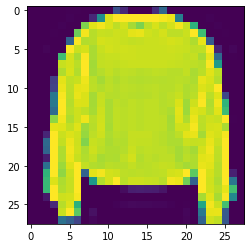

In [17]:
#Can we see a visual?

plt.imshow(X_train[7])

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.